In [1]:
# Preamble load packages
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn import preprocessing
working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"


In [2]:

# ██████╗░░█████╗░████████╗░█████╗░  ██████╗░██████╗░░█████╗░░█████╗░███████╗░██████╗░██████╗██╗███╗░░██╗░██████╗░
# ██╔══██╗██╔══██╗╚══██╔══╝██╔══██╗  ██╔══██╗██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔════╝██╔════╝██║████╗░██║██╔════╝░
# ██║░░██║███████║░░░██║░░░███████║  ██████╔╝██████╔╝██║░░██║██║░░╚═╝█████╗░░╚█████╗░╚█████╗░██║██╔██╗██║██║░░██╗░
# ██║░░██║██╔══██║░░░██║░░░██╔══██║  ██╔═══╝░██╔══██╗██║░░██║██║░░██╗██╔══╝░░░╚═══██╗░╚═══██╗██║██║╚████║██║░░╚██╗
# ██████╔╝██║░░██║░░░██║░░░██║░░██║  ██║░░░░░██║░░██║╚█████╔╝╚█████╔╝███████╗██████╔╝██████╔╝██║██║░╚███║╚██████╔╝
# ╚═════╝░╚═╝░░╚═╝░░░╚═╝░░░╚═╝░░╚═╝  ╚═╝░░░░░╚═╝░░╚═╝░╚════╝░░╚════╝░╚══════╝╚═════╝░╚═════╝░╚═╝╚═╝░░╚══╝░╚═════╝░

In [3]:
# Load main dataframe
main_df = gpd.read_file(f"{data_dir}/3-AnalysisData/delitos_por_scatastral.gpkg")
main_df.shape

(1171, 62)

In [4]:
main_df.columns

Index(['SCACODIGO', 'SCATIPO', 'SCANOMBRE', 'SHAPE_Leng', 'SHAPE_Area',
       'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_stddev',
       'pob_scatastral_2018', 'pob_scatastral_2019', 'pob_scatastral_2020',
       'pob_scatastral_2021', 'pob_scatastral_2022', 'pob_scatastral_2023',
       'pob_scatastral_2024', 'delitos_sexuales_2018',
       'tasa_delitos_sexuales_2018', 'homicidios_2018', 'tasa_homicidios_2018',
       'homicidios_2019', 'tasa_homicidios_2019', 'homicidios_2020',
       'tasa_homicidios_2020', 'homicidios_2021', 'tasa_homicidios_2021',
       'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
       'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
       'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
       'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'tasa_hurto_a_residencias_2018',
       'hurto_automotores_2018', 'tasa_hurto_aut

In [5]:
# Load variable dataframe
rpredial = gpd.read_file(f"{data_dir}/Desarrollo/rpredial-2019.gpkg")
rpredial.columns
rpredial=rpredial.rename(columns={'Sum_VALOR_':'rpredial_2019'})

In [6]:
rpredial.sort_values(by='rpredial_2019',ascending=False).head()

OBJECTID                 SCANOMBRE COD_SECTOR  rpredial_2019  \
103       104               CHICO NORTE     008307   6.432471e+10   
295       296     SANTA BARBARA CENTRAL     008415   5.178209e+10   
113       114     CHICO NORTE II SECTOR     008301   4.950367e+10   
102       103  SANTA BARBARA OCCIDENTAL     008417   4.512772e+10   
651       652                  EL CHICO     008308   4.153200e+10   

     SHAPE_Length  SHAPE_Area  \
103      0.044165    0.000079   
295      0.036439    0.000087   
113      0.030632    0.000046   
102      0.039000    0.000085   
651      0.038250    0.000049   

                                              geometry  
103  MULTIPOLYGON (((-74.05098 4.67949, -74.05071 4...  
295  MULTIPOLYGON (((-74.04277 4.70412, -74.04275 4...  
113  MULTIPOLYGON (((-74.03897 4.68030, -74.03853 4...  
102  MULTIPOLYGON (((-74.04317 4.69652, -74.04318 4...  
651  MULTIPOLYGON (((-74.04512 4.66875, -74.04867 4...

# Clean data

In [7]:
# Control by the size of the sector catastral by dividing by its size the recaudo of the impuesto predial
rpredial['rpredial_2019_d']=rpredial['rpredial_2019']/(rpredial['SHAPE_Area']*1000000)

# Adding standardized variable "rpredial"
rpredial=pd.merge(rpredial,pd.Series(preprocessing.scale(rpredial['rpredial_2019_d']), name='rpredial_2019_dZ') , left_index=True, right_index=True)

<Axes: >

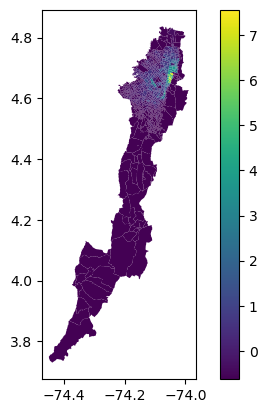

In [8]:
rpredial.plot(column='rpredial_2019_dZ', legend=True)

In [9]:
display(rpredial.shape,rpredial.columns)
rpredial.drop(columns=['geometry',  'SHAPE_Length','SHAPE_Area'], inplace=True)

(1170, 9)

Index(['OBJECTID', 'SCANOMBRE', 'COD_SECTOR', 'rpredial_2019', 'SHAPE_Length',
       'SHAPE_Area', 'geometry', 'rpredial_2019_d', 'rpredial_2019_dZ'],
      dtype='object')

In [13]:
main_merge=pd.merge(main_df, rpredial, left_on='SCACODIGO', right_on='COD_SECTOR', how='left')

In [16]:
main_merge.columns

Index(['SCACODIGO', 'SCATIPO', 'SCANOMBRE_x', 'SHAPE_Leng', 'SHAPE_Area',
       'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_stddev',
       'pob_scatastral_2018', 'pob_scatastral_2019', 'pob_scatastral_2020',
       'pob_scatastral_2021', 'pob_scatastral_2022', 'pob_scatastral_2023',
       'pob_scatastral_2024', 'delitos_sexuales_2018',
       'tasa_delitos_sexuales_2018', 'homicidios_2018', 'tasa_homicidios_2018',
       'homicidios_2019', 'tasa_homicidios_2019', 'homicidios_2020',
       'tasa_homicidios_2020', 'homicidios_2021', 'tasa_homicidios_2021',
       'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
       'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
       'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
       'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'tasa_hurto_a_residencias_2018',
       'hurto_automotores_2018', 'tasa_hurto_a

# Incumplimiento Impuesto Predial

In [11]:
# df=pd.read_csv(f"{data_dir}/Desarrollo/15.-cumplimiento-impuesto-predial-2007-2018.csv")
# df.head()

# Export

In [17]:
main_merge.to_file(f"{data_dir}/3-AnalysisData/Bases listas/scatastral.gpkg", driver="GPKG")